In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2g}".format
from scipy.stats import norm, multivariate_normal
from scipy.stats.mvn import mvnun
from scipy.integrate import quad
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["font.size"] = 16

/var/folders/rl/jll8zb7n49d7ns3jcsyf8g4h0000gn/T/ipykernel_10545/2867096263.py:5: DeprecationWarning: Please use `mvnun` from the `scipy.stats` namespace, the `scipy.stats.mvn` namespace is deprecated.
  from scipy.stats.mvn import mvnun


# Question 1. 

Suppose that the default rate of a portfolio has the triangular distribution: $\phi_{dr}[dr] = 2-2dr$. Suppose that in this portfolio $lgd$ is a function of $dr:lgd[dr]=dr^{\frac{1}{2}}$. Derive and state the function $\phi_{lgd}[lgd]$. Create a single diagram containing plots of ($\phi_{dr}[dr]$ and $\phi_{lgd}[lgd]$) for variables in the range between 0 and 1.

$$\begin{aligned}
    \phi_{dr}[x] &= 2-2x \\
    \Phi_{dr}[x] &= 2x-x^2 = \mathbb{P}[DR<x] \\
    LGD &= DR^{\frac{1}{2}} \\
    \Phi_{lgd}[x] &= \mathbb{P}[LGD<x] = \mathbb{P}[DR^{\frac{1}{2}}<x] = \mathbb{P}[DR<x^2] \\
        &= 2x^2-x^4 \\
    \phi_{lgd}[x] &= \Phi_{lgd}'[x] = 4x-4x^3
\end{aligned}$$

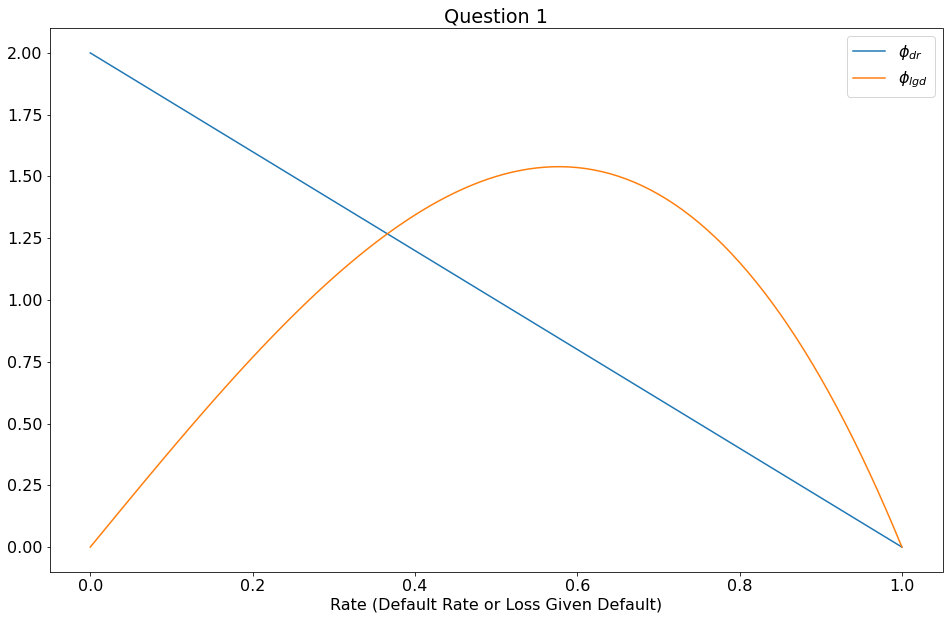

In [2]:
def phi_dr(x): return 2-2*x
def phi_lgd(x): return 4*x - 4*x**3

x     = np.linspace(0,1,101)
y_dr  = phi_dr(x)
y_lgd = phi_lgd(x)

plt.plot(x, y_dr, label="$\phi_{dr}$")
plt.plot(x, y_lgd, label="$\phi_{lgd}$")
plt.xlabel("Rate (Default Rate or Loss Given Default)")
plt.title("Question 1")
plt.legend()
plt.show()

# Question 2.

Making the same assumptions as in Question 1, derive and state $\phi_{loss}[loss]$. Create a
diagram containing the two plots from Question 1 along with the plot of $\phi_{loss}[loss]$ for variables $loss$ in the range between 0 and 1; limit the vertical axis to the range from zero to 3. State the values of

$$\begin{aligned}
    \phi_{dr}[x] &= 2-2x \\
    \Phi_{dr}[x] &= 2x-x^2 = \mathbb{P}[DR<x] \\
    LOSS &= LGD*DR = DR^{\frac{3}{2}} \\
    \Phi_{loss}[x] &= \mathbb{P}[LOSS<x] = \mathbb{P}[DR^{\frac{3}{2}}<x] = \mathbb{P}[DR<x^{\frac{2}{3}}] \\
        &= 2x^{\frac{2}{3}}-x^{\frac{4}{3}} \\
    \phi_{loss}[x] &= \Phi_{loss}'[x] = \frac{4}{3} \bigg(x^{-\frac{1}{3}}-x^{\frac{1}{3}} \bigg)
\end{aligned}$$

* Expected loss, EL

$$\begin{aligned}
    \mathbb{E}[LOSS] &= \int_0^1 x \phi_{loss}[x] dx \\
        &= \int_0^1 \frac{4}{3} \bigg(x^{\frac{2}{3}}-x^{\frac{4}{3}} \bigg) dx = \bigg[ \frac{4}{3}\bigg(\frac{3}{5}x^{\frac{5}{3}}-\frac{3}{7}x^{\frac{7}{3}} \bigg) \bigg] \bigg|_{x=0}^1 \\
        &= \frac{8}{35} \\
\end{aligned}$$

* Expected LGD, ELGD

ELGD = $\mathbb{E}[LOSS] / \mathbb{E}[DR]$

$$\begin{aligned}
    \mathbb{E}[DR] &= \int_0^1 x \phi_{dr}[x] dx \\
        &= \int_0^1 2x-2x^2 dx = \bigg[ x^2-\frac{2}{3}x^3 \bigg] \bigg|_{x=0}^1 \\
        &= \frac{1}{3} \\
    \mathbb{E}[LOSS] / \mathbb{E}[DR] &= \frac{24}{35}
\end{aligned}$$

* “Time-weighted” LGD

$$\begin{aligned}
    \mathbb{E}[LGD] &= \int_0^1 x \phi_{lgd}[x] dx \\
        &= \int_0^1 4x^2-4x^4 dx = \bigg[ 4(\frac{x^3}{3}-\frac{x^5}{5}) \bigg] \bigg|_{x=0}^1 \\
        &= \frac{8}{15} \\
\end{aligned}$$

/var/folders/rl/jll8zb7n49d7ns3jcsyf8g4h0000gn/T/ipykernel_10545/14247840.py:1: RuntimeWarning: divide by zero encountered in power
  def phi_loss(x): return 4/3*(x**(-1/3) - x**(1/3))


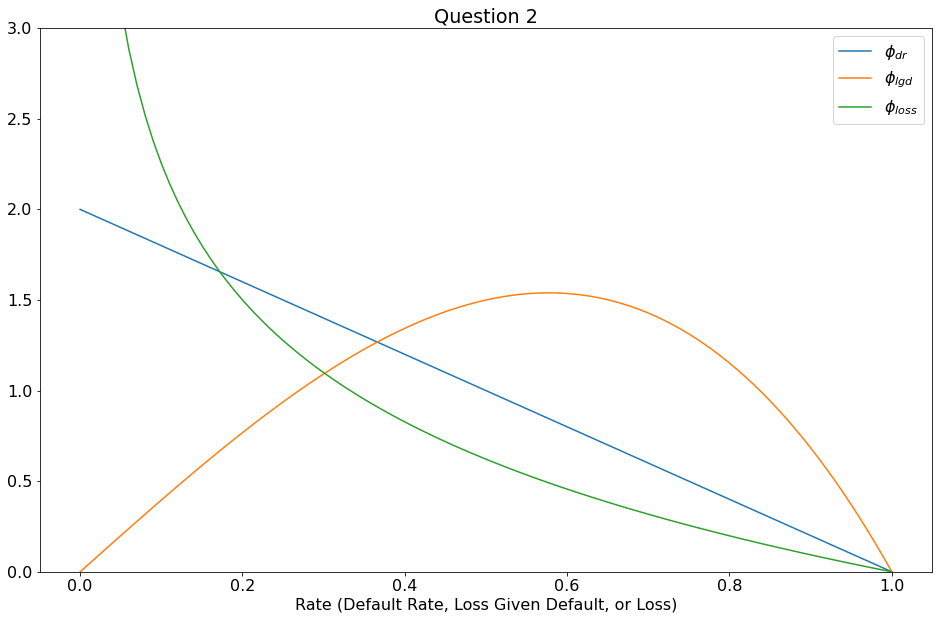

In [3]:
def phi_loss(x): return 4/3*(x**(-1/3) - x**(1/3))

y_loss = phi_loss(x)

plt.plot(x, y_dr, label="$\phi_{dr}$")
plt.plot(x, y_lgd, label="$\phi_{lgd}$")
plt.plot(x, y_loss, label="$\phi_{loss}$")
plt.xlabel("Rate (Default Rate, Loss Given Default, or Loss)")
plt.ylim([0,3])
plt.title("Question 2")
plt.legend()
plt.show()

# Question 3.

Express the standard deviation of a Vasicek distribution as an integral that involves the Vasicek PDF. For distributions with $PD = 0.10$, numerically integrate and plot the standard deviation for $0.05 < \rho < 0.95$. On a separate diagram, plot two Vasicek distributions: $PD = 0.10, \rho = 0.05$ and $PD = 0.10, \rho = 0.95$, limiting the vertical axis to $[0, 12]$.

$$\begin{aligned}
    \mathbb{E}[x] &= \int_0^1 x \frac{\sqrt{1-\rho}}{\sqrt{\rho}\phi[\Phi^{-1}[x]]} \phi \bigg[ \frac{\sqrt{1-\rho}\Phi^{-1}[x] - \Phi^{-1}[PD]}{\sqrt{\rho}} \bigg] dx \\
        &= PD \\
    Var[x] &= \int (x-\mathbb{E}[x])^2 \phi[x] dx = \int_0^1 x^2 \frac{\sqrt{1-\rho}}{\sqrt{\rho}\phi[\Phi^{-1}[x]]} \phi \bigg[ \frac{\sqrt{1-\rho}\Phi^{-1}[x] - \Phi^{-1}[PD]}{\sqrt{\rho}} \bigg] dx - \mathbb{E}[x]^2 \\
\end{aligned}$$

/var/folders/rl/jll8zb7n49d7ns3jcsyf8g4h0000gn/T/ipykernel_10545/1005679164.py:12: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  var = quad(lambda x: vas_var(x, rho=r, pd=0.1), 0, 1)[0]
/var/folders/rl/jll8zb7n49d7ns3jcsyf8g4h0000gn/T/ipykernel_10545/1005679164.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  var = quad(lambda x: vas_var(x, rho=r, pd=0.1), 0, 

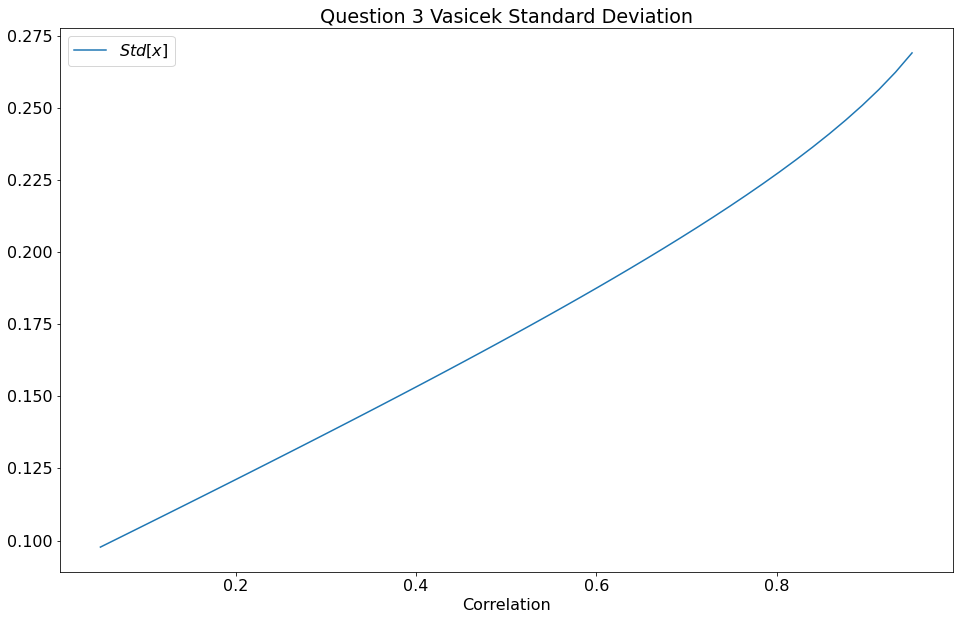

In [4]:
def vas_pdf(x, rho, pd):
    return ((1-rho)**0.5 / ((rho)**0.5 * norm.pdf(norm.ppf(x))) 
            * norm.pdf(((1-rho)**0.5*norm.ppf(x)-norm.ppf(pd))/rho**0.5))

def vas_var(x, rho, pd):
    return x**2*vas_pdf(x, rho, pd)

rhos = np.linspace(0.05, 0.95, 50)
stds = np.zeros(50)

for i, r in enumerate(rhos):
    var = quad(lambda x: vas_var(x, rho=r, pd=0.1), 0, 1)[0]
    stds[i] = var**0.5 - 0.01
    
plt.plot(rhos, stds, label="$Std[x]$")
plt.xlabel("Correlation")
plt.title("Question 3 Vasicek Standard Deviation")
plt.legend()
plt.show()

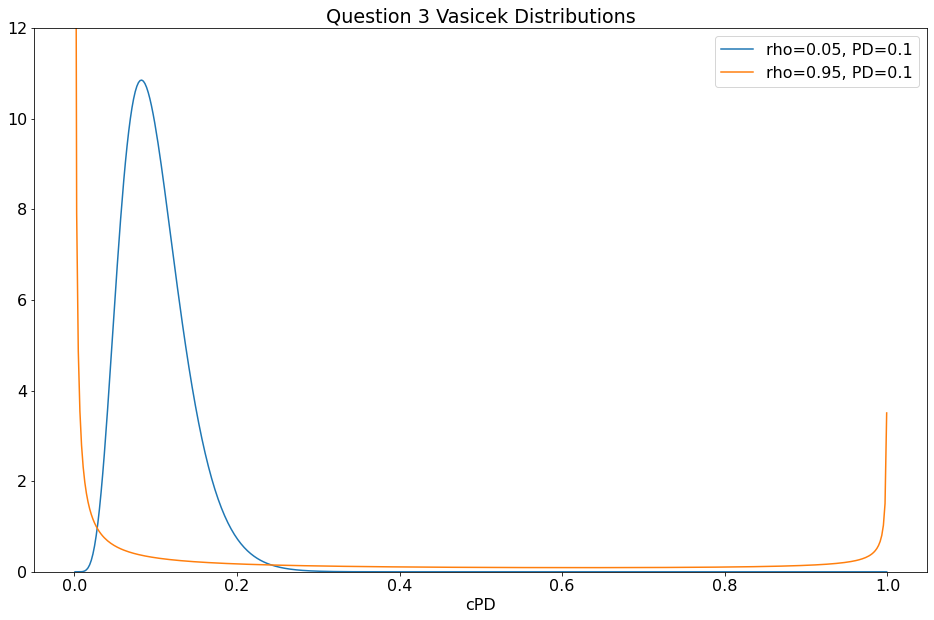

In [5]:
x = np.linspace(1e-3,1-1e-3,500)
vas_0 = vas_pdf(x, rho=0.05, pd=0.1)
vas_1 = vas_pdf(x, rho=0.95, pd=0.1)

plt.plot(x, vas_0, label="rho=0.05, PD=0.1")
plt.plot(x, vas_1, label="rho=0.95, PD=0.1")
plt.xlabel("cPD")
plt.ylim([0,12])
plt.title("Question 3 Vasicek Distributions")
plt.legend()
plt.show()

# Question 4.

Suppose two loans have Vasicek distributions. One loan has $PD = 0.06, \rho = 0.06$, the second loan has $PD = 0.03, \rho = 0.20$, and both loans respond to the same systematic risk factor. Plot on a single diagram the two inverse CDFs. At the lower quantiles, the first loan has greater cPD than the second. The situation is reversed at very high quantiles. Estimate the quantile at which both loans have the same value of cPD.



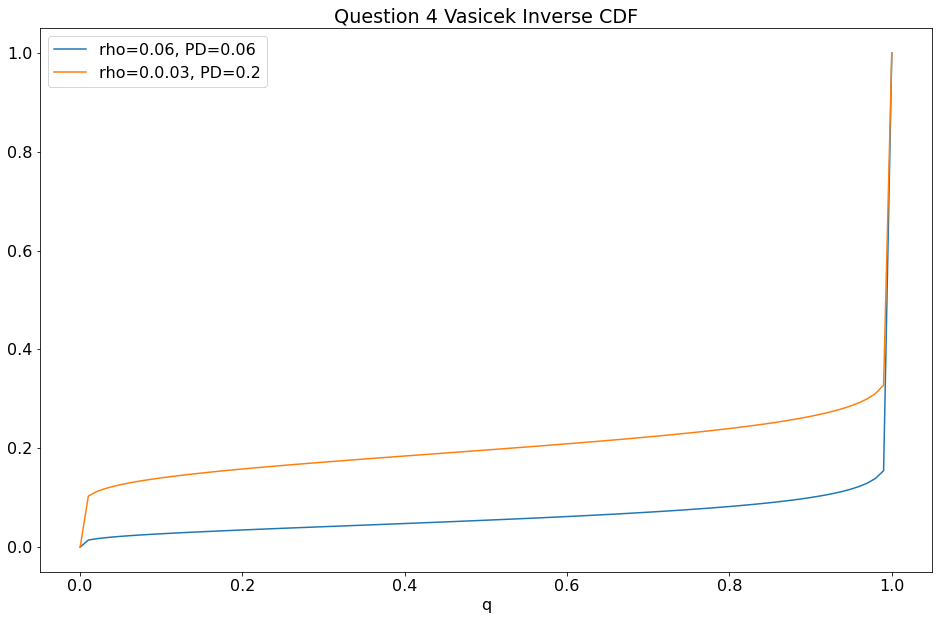

In [6]:
def vas_inv(q, rho, pd):
    return norm.cdf((norm.ppf(pd)+rho**0.5*norm.ppf(q))/(1-rho)**0.5)

q = np.linspace(0,1,100)
vi_0 = vas_inv(q, rho=0.06, pd=0.06)
vi_1 = vas_inv(q, rho=0.03, pd=0.2)

plt.plot(q, vi_0, label="rho=0.06, PD=0.06")
plt.plot(q, vi_1, label="rho=0.03, PD=0.2")
plt.xlabel("q")
plt.title("Question 4 Vasicek Inverse CDF")
plt.legend()
plt.show()

In [13]:
norm.cdf((norm.ppf(0.06)-norm.ppf(0.2))/(0.03**0.5-0.06**0.5))

9.940251720669705